In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2]:
df = pd.read_csv("world-data-2023.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

In [4]:
df.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [5]:
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [6]:
df.keys()

Index(['Country', 'Density\n(P/Km2)', 'Abbreviation', 'Agricultural Land( %)',
       'Land Area(Km2)', 'Armed Forces size', 'Birth Rate', 'Calling Code',
       'Capital/Major City', 'Co2-Emissions', 'CPI', 'CPI Change (%)',
       'Currency-Code', 'Fertility Rate', 'Forested Area (%)',
       'Gasoline Price', 'GDP', 'Gross primary education enrollment (%)',
       'Gross tertiary education enrollment (%)', 'Infant mortality',
       'Largest city', 'Life expectancy', 'Maternal mortality ratio',
       'Minimum wage', 'Official language', 'Out of pocket health expenditure',
       'Physicians per thousand', 'Population',
       'Population: Labor force participation (%)', 'Tax revenue (%)',
       'Total tax rate', 'Unemployment rate', 'Urban_population', 'Latitude',
       'Longitude'],
      dtype='object')

In [7]:
newdf = df[['Country','Density\n(P/Km2)', 'Agricultural Land( %)','Armed Forces size','Birth Rate', 'Total tax rate','Unemployment rate','Urban_population','GDP']]

In [8]:
key = newdf.keys()

In [9]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Density
(P/Km2)        195 non-null    object 
 2   Agricultural Land( %)  188 non-null    object 
 3   Armed Forces size      171 non-null    object 
 4   Birth Rate             189 non-null    float64
 5   Total tax rate         183 non-null    object 
 6   Unemployment rate      176 non-null    object 
 7   Urban_population       190 non-null    object 
 8   GDP                    193 non-null    object 
dtypes: float64(1), object(8)
memory usage: 13.8+ KB


In [10]:
newdf.iloc[:,[1,3,7]]

,Density\n(P/Km2),Armed Forces size,Urban_population
0,60,"323,000","9,797,273"
1,105,"9,000","1,747,593"
2,18,"317,000","31,510,100"
3,164,NaN,"67,873"
4,26,"117,000","21,061,025"
...,...,...,...
190,32,"343,000","25,162,368"
191,314,"522,000","35,332,140"
192,56,"40,000","10,869,523"
193,25,"16,000","7,871,713"


In [11]:
newdf

,Country,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Birth Rate,Total tax rate,Unemployment rate,Urban_population,GDP
0,Afghanistan,60,58.10%,"323,000",32.49,71.40%,11.12%,"9,797,273","$19,101,353,833"
1,Albania,105,43.10%,"9,000",11.78,36.60%,12.33%,"1,747,593","$15,278,077,447"
2,Algeria,18,17.40%,"317,000",24.28,66.10%,11.70%,"31,510,100","$169,988,236,398"
3,Andorra,164,40.00%,NaN,7.20,NaN,NaN,"67,873","$3,154,057,987"
4,Angola,26,47.50%,"117,000",40.73,49.10%,6.89%,"21,061,025","$94,635,415,870"
...,...,...,...,...,...,...,...,...,...
190,Venezuela,32,24.50%,"343,000",17.88,73.30%,8.80%,"25,162,368","$482,359,318,768"
191,Vietnam,314,39.30%,"522,000",16.75,37.60%,2.01%,"35,332,140","$261,921,244,843"
192,Yemen,56,44.60%,"40,000",30.45,26.60%,12.91%,"10,869,523","$26,914,402,224"
193,Zambia,25,32.10%,"16,000",36.19,15.60%,11.43%,"7,871,713","$23,064,722,446"


In [26]:
# Remove the Null Values from the Dataset
attr = list(newdf.keys())
for i in attr:
    a = newdf[newdf[i].isnull()]
    newdf = newdf.drop(labels = a.index, axis = 0)


In [28]:
#Now We will Focus on Change all data type to float in all columns except Country

# String to Float
attribute_name = ['Density\n(P/Km2)','Armed Forces size','Urban_population']
for i in attribute_name:
    lis = list(newdf[i])
    for n in range(len(lis)):
        ele = list(lis[n])
        while("," in ele):
            ele.remove(",")
        
        word = ""
        for a in ele:
            word = word + a
        
        lis[n] = float(word)
    newdf[i] = lis

In [29]:
# percentage to float

attribute_name = ['Agricultural Land( %)','Total tax rate','Unemployment rate']
for i in attribute_name:
    lis = list(newdf[i])
    for n in range(len(lis)):
        ele = list(lis[n])
        ele.remove("%")
        word = ''
        for a in ele:
            word = word + a
        ele = float(word)
        ele = ele/100
        lis[n] = ele
    newdf[i] = lis

In [41]:
#Dealing with GDP

#Rename the Column (GDP) to GDP(in Billions)
newdf = newdf.rename(columns = {"GDP":"GDP(in $ Billions)"})

lis = list(newdf['GDP(in $ Billions)'])
for i in range(len(lis)):
    ele = list(lis[i][1:-8])
    while(',' in ele):
        ele.remove(',')
    word = ''
    for a in ele:
        word = word + a
    lis[i] = float(word)/1000
newdf['GDP(in $ Billions)'] = lis



In [43]:
newdf

,Country,Density\n(P/Km2),Agricultural Land( %),Armed Forces size,Birth Rate,Total tax rate,Unemployment rate,Urban_population,GDP(in $ Billions)
0,Afghanistan,60.0,0.581,323000.0,32.49,0.714,0.1112,9797273.0,19.101
1,Albania,105.0,0.431,9000.0,11.78,0.366,0.1233,1747593.0,15.278
2,Algeria,18.0,0.174,317000.0,24.28,0.661,0.1170,31510100.0,169.988
4,Angola,26.0,0.475,117000.0,40.73,0.491,0.0689,21061025.0,94.635
6,Argentina,17.0,0.543,105000.0,17.02,1.063,0.0979,41339571.0,449.663
...,...,...,...,...,...,...,...,...,...
190,Venezuela,32.0,0.245,343000.0,17.88,0.733,0.0880,25162368.0,482.359
191,Vietnam,314.0,0.393,522000.0,16.75,0.376,0.0201,35332140.0,261.921
192,Yemen,56.0,0.446,40000.0,30.45,0.266,0.1291,10869523.0,26.914
193,Zambia,25.0,0.321,16000.0,36.19,0.156,0.1143,7871713.0,23.064


In [45]:
X = newdf[['Density\n(P/Km2)','Agricultural Land( %)','Armed Forces size','Birth Rate',	'Total tax rate','Urban_population','GDP(in $ Billions)']]

In [90]:
Y = newdf['Unemployment rate']

In [91]:
Y.ndim

1

In [92]:
x_train , x_test , y_train , y_test =train_test_split(X,Y, test_size =0.25)

In [93]:
model = LinearRegression()

In [94]:
model.fit(x_train, y_train)

LinearRegression()

In [95]:
y_pred = model.predict(x_test)

In [99]:
print("Mean squared error",mean_squared_error(y_test,y_pred))
print("Mean absolute error",mean_absolute_error(y_test,y_pred))


Mean squared error 0.003801099510105581
Mean absolute error 0.048591844333046134


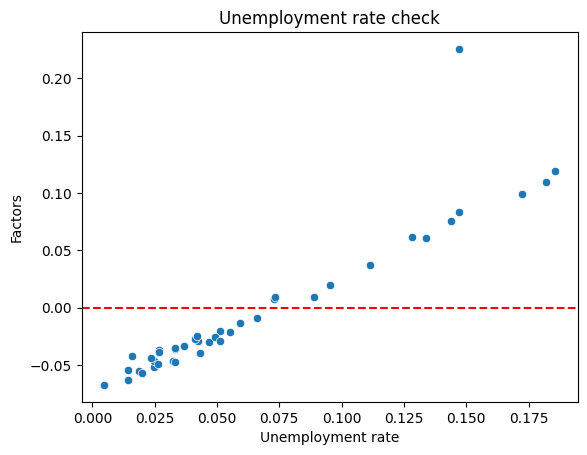

In [102]:
residuals = y_test - y_pred
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Unemployment rate")
plt.ylabel("Factors")
plt.title("Unemployment rate check")
plt.show()

In [105]:
# X = newdf[['Density\n(P/Km2)','Agricultural Land( %)','Armed Forces size','Birth Rate',	'Total tax rate','Urban_population','GDP(in $ Billions)']]
model.predict([[60,0.581,323000,32.49,0.714,9797273,19.101]])

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.07401417])